# The Indian Start-up Funding Ecosystem

***Exploring the Dynamics of the Indian Startup Ecosystem: A Comprehensive Analysis of Funding Trends (2018-2021)***

The Task -My team is trying to venture into the Indian Start-up ecosystem. As the data experts of the team, we are to investigate the ecosystem and propose the best course of action.


### 1.0 Business Understanding

The entrepreneurial landscape in India is experiencing unprecedented dynamism, marked by a substantial increase in the establishment of startups in recent years. These innovative ventures have not only proliferated in number but have also secured noteworthy funding. This notebook delves into the intricate fabric of the Indian startup funding ecosystem, conducting a comprehensive analysis of funding data spanning from 2018 to 2021. Through this exploration, we aim to unveil crucial insights into prevalent trends, funding dynamics, and the pivotal factors steering the triumph of startups. Our inquiry extends to examining the correlation between funding and the trajectory of startup evolution, with a keen eye on temporal trends and the distinctive dynamics unfolding at the city level. Additionally, we seek to pinpoint sectors that garner preferential investment, unraveling industry-specific funding trends that contribute to the evolving narrative of India's startup landscape.



### 1.1 Objective

Understanding the Indian startup ecosystem  from **2018 to 2021**, and providing information about the funding to potential investors and other stakeholders like governments, enterprenuers, competitors etc who need this information for decision making.



### 1.2 Hypothesis
**Null Hypothesis(Ho)** : The sector of a company does not have an impact on the amount of funding it receives.


**Alternate Hypothesis(Ha)** : The sector of a company does have an impact on the amount of funding it receives

### 1.3 Research Questions

1. Which year has the highest amount of funding?

2. Which sector received the highest amount of funding collectively?

3. Which region has the most startups?

4. Which Region received the most investment

5. Top 10 companies with highest amount invested

### 2.0 Data Understanding

This phase helps us to familiarize ourselves with the characteristics, structure, and quality of the data. It is the foundation for making informed decisions about the data preprocessing steps that may be required before analysis.

#### 2.1 Installations


In [90]:
# %pip install forex-python
# %pip install pandas
# %pip install python-dotenv
# %pip install seaborn
# %pip install matplotlib
# %pip install pyodbc
# %pip install numpy
# %pip install scipy
# %pip install scikit-learn

#### 2.2 Importing the necessary libraries

In [91]:
import pyodbc
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 
import numpy as np
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from forex_python.converter import CurrencyRates
import re
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
import scipy.stats
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import kruskal, mannwhitneyu
from fuzzywuzzy import process

### 2.3 Connecting to the Microsoft SQL Server database- retrieving data for 2020 and 2021


-   **pyodbc**: A package for creating connection strings to your remote database
-   **python-dotenv**: A package for creating environment variables that will help you hide sensitve configuration informantion such as database credentials and API keys

In [92]:
# Loading environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# Using the connect method of the pyodbc library and passing in the connection string.
# This will connect to the server and might take a few seconds to be complete. 

connection = pyodbc.connect(connection_string)

### 2.4 Load data for 2020 and 2021


In [93]:

query = "Select * from LP1_startup_funding2020"

df_2020 = pd.read_sql(query, connection)


query = "Select * from LP1_startup_funding2021"

df_2021 = pd.read_sql(query, connection)



### 2.5 Load the data for 2019 from the OneDrive link



In [94]:
# Loading 2019 data which is a CSV file on OneDrive 
file_path = "C:/Users/IddieGod/Desktop/MY-LP1-PROJECT/startup_funding2019.csv"

# Reading the CSV file
df_2019 = pd.read_csv(file_path)



### 2.6 Load the data for 2018 from the GitHub repository


In [95]:
# Loading 2018 CSV Data from Github using URL.

github_url = "https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv"

df_2018 = pd.read_csv(github_url)


### 3.0 Cleaning the Data
Cleaning the data involves handling missing values, removing duplicates, and standardizing the data format.
df_2018.head()

In [96]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [97]:

df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and frolic of Colleges."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy farmers in rural Maharashtra.
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants to create a difference by selling globally.


In [98]:

df_2019.head()


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,"A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students","Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ Labs","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, processing and marketing of seeds",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [99]:

df_2019.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [100]:

df_2020.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge",340000.0,None,None


In [101]:

df_2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [102]:

df_2021.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,"Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.","Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school transformation system that assures excellent learning for every child.,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marketplace for packaging products.,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, empowering them with financial literacy and ease of secured financial transactions.",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [103]:

df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


### 3.1 Issues with data
-  Columns from different years have different names that must be renamed to be the same
-  A year column must be added to all tables to represent the year of investment. This will be important once all tables are merged
-  Amount column needs to be standardized to the same currency ($), and converted to the same datatype (float). Symbols and commas should be dropped. We assume that the amount values with no currecny symbol are is dollars.
-  Duplicate values in each table should be dropped
-  Missing values should be filled with an appropriate value for each column

In [104]:

#### 3.1.1 *Cleaning for df_2018*

In [105]:

# Check for missing values in df_2018
df_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [106]:

# Check for duplicates
df_2018.duplicated().sum()

1

In [107]:

# Remove duplicates in df_2018
df_2018 = df_2018.drop_duplicates()


In [108]:

df_2018.info()


<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   525 non-null    object
 1   Industry       525 non-null    object
 2   Round/Series   525 non-null    object
 3   Amount         525 non-null    object
 4   Location       525 non-null    object
 5   About Company  525 non-null    object
dtypes: object(6)
memory usage: 28.7+ KB



### 3.1.2 - Cleaning the Amounts column df_2018

After checking the amount column,we noticed that there were non numeric characters and some had different currencies
We took a sample of 5 companies and after doing some research online we came to the realization that the funding was given in dollars


In [109]:

# Function to convert amount to USD
def convert_to_usd(amount, exchange_rate=68.4113): #Exchange rate as of 10 November 2023
    try:
        # If the amount contains '₹', remove it and convert to float
        if '₹' in amount:
            amount = amount.replace('₹', '').replace(',', '')
            return float(amount) / exchange_rate
        # If the amount is '—' or any other non-numeric value, return NaN
        elif not pd.to_numeric(amount):
            return np.nan
        # If the amount is already in dollars, return it as is
        else:
            return float(amount)
    except ValueError:
        return np.nan

# Apply the conversion to 'Amount' column by creating a new column 
df_2018['Amount ($)'] = df_2018['Amount'].apply(convert_to_usd)

# Display the modified DataFrame
df_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Amount ($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.",2.500000e+05
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy farmers in rural Maharashtra.,5.846987e+05
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,9.501354e+05
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.,2.000000e+06
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants to create a difference by selling globally.,NaN
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specifically for small and medium businesses in India.",2.250000e+08
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,NaN
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives to start household food business and avail everyone with their homemade healthy dishes.,7.500000e+03
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop software to service a range of industry requirements.,5.116114e+05


In [110]:

# checking for null values in the amount column
df_2018['Amount ($)'].isna().sum()

df_2018['Amount ($)']

0      2.500000e+05
1      5.846987e+05
2      9.501354e+05
3      2.000000e+06
4               NaN
           ...     
521    2.250000e+08
522             NaN
523    7.500000e+03
524    5.116114e+05
525    3.500000e+07
Name: Amount ($), Length: 525, dtype: float64

In [111]:

# Drop the original 'Amount' column in df_2018
df_2018 = df_2018.drop('Amount', axis=1)

In [112]:

#Using the simple imputer to impute for the missing values in the amount column

from sklearn.impute import SimpleImputer # To fill the Nan Values in the amounts column

# Create a SimpleImputer instance
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit and transform the imputer on the 'Amount ($)' column
df_2018['Amount ($)'] = imputer.fit_transform(df_2018[['Amount ($)']])

# Display the updated DataFrame
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   525 non-null    object 
 1   Industry       525 non-null    object 
 2   Round/Series   525 non-null    object 
 3   Location       525 non-null    object 
 4   About Company  525 non-null    object 
 5   Amount ($)     525 non-null    float64
dtypes: float64(1), object(5)
memory usage: 28.7+ KB


### 3.1.2 - Cleaning the Industry column df_2018

In [113]:

df_2018['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [114]:

# Missing values in Industry Column
df_2018[df_2018['Industry'] == '—'].head()

,Company Name,Industry,Round/Series,Location,About Company,Amount ($)
58,MissMalini Entertainment,—,Seed,"Mumbai, Maharashtra, India","MissMalini Entertainment is a multi-platform new media network dedicated to Entertaining, Connecting & Empowering young Indians.",1.520217e+06
105,Jagaran Microfin,—,Debt Financing,"Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution which achieves a healthy amalgamation of social and financial,8.039607e+06
121,FLEECA,—,Seed,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.,1.061965e+07
146,WheelsEMI,—,Series B,"Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI Pvt. Ltd.",1.061965e+07
153,Fric Bergen,—,Venture - Series Unknown,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food industry.,1.061965e+07


In [115]:

# Replace missing values with np.nan
df_2018['Industry']=df_2018['Industry'].replace('—',np.nan)

# we want to simplify the industry column
# Split values with a comma delimiter, select only the first element from the resulting list of substrings
# remove single quotes, since it is a string

df_2018['Industry'] = df_2018['Industry'].str.split(',').str[0].str.replace("'", "", regex=True)

df_2018['Industry'].sort_values()


139    3D Printing
446     Accounting
422     Accounting
17      Accounting
81     Advertising
          ...     
473            NaN
476            NaN
478            NaN
480            NaN
510            NaN
Name: Industry, Length: 525, dtype: object

In [116]:

#Observe the max column width
pd.set_option("display.max_colwidth", None)
df_2018[df_2018['Industry'] == 'Android']

,Company Name,Industry,Round/Series,Location,About Company,Amount ($)
265,edureka!,Android,Series A,"Bangalore, Karnataka, India","Edureka is the fastest growing online learning platform that offers live, instructor-led courses for professionals from various industries.",2000000.0


In [117]:

# Fix some structural errors (done through observation and individual inspection)

df_2018['Industry'].replace('Android','E-Learning',inplace =True)
df_2018['Industry'].replace('Wellness','Health Care',inplace =True)
df_2018['Industry'].replace('Basketball','Apps',inplace =True) 
df_2018['Industry'].replace('Catering','Food Delivery',inplace =True)
df_2018['Industry'].replace('Cooking','Food Delivery',inplace =True)
df_2018['Industry'].replace('Crowdsourcing','Crowdfunding',inplace =True)

In [118]:

df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   525 non-null    object 
 1   Industry       495 non-null    object 
 2   Round/Series   525 non-null    object 
 3   Location       525 non-null    object 
 4   About Company  525 non-null    object 
 5   Amount ($)     525 non-null    float64
dtypes: float64(1), object(5)
memory usage: 28.7+ KB


In [119]:

# Add a year column
df_2018['Year'] = 2018

### 3.1.3 - Cleaning the Location column df_2018


In [120]:

df_2018['Location'].value_counts()

Location
Bangalore, Karnataka, India         101
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India    

In [121]:

# Convert 'HeadQuarter' column to lowercase and remove leading/trailing whitespaces
df_2018['Location'] = df_2018['Location'].str.lower().str.strip()

In [122]:

# simplify the location column
# Split values with a comma delimiter, select only the first element from the resulting list of substrings
# remove single quotes, since it is a string

df_2018['Location'] = df_2018['Location'].str.split(',').str[0].replace("'","",regex=True)

In [123]:
#Map states to respective capital cities in the location column
state_capitals = {'haryana': 'chandigarh', 'uttar pradesh': 'lucknow', 'rajasthan': 'jaipur', 'telangana': 'hyderabad', 'gujarat': 'gandhinagar', 'kerala': 'thiruvananthapuram', 'maharashtra': 'mumbai', 'west bengal': 'kolkata', 'odisha': 'bhubaneswar', 'bihar': 'patna', 'telugana': 'hyderabad', 'goa': 'panaji', 'tamil nadu': 'chennai', 'karnataka': 'bangalore', 'delhi': 'new delhi', 'india': 'new delhi'}

df_2018['Location'] = df_2018['Location'].replace({k: state_capitals.get(k, k) for k in df_2018['Location'].unique()})

df_2018.head(10)


,Company Name,Industry,Round/Series,Location,About Company,Amount ($),Year
0,TheCollegeFever,Brand Marketing,Seed,bangalore,"TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.",2.500000e+05,2018
1,Happy Cow Dairy,Agriculture,Seed,mumbai,A startup which aggregates milk from dairy farmers in rural Maharashtra.,5.846987e+05,2018
2,MyLoanCare,Credit,Series A,gurgaon,Leading Online Loans Marketplace in India,9.501354e+05,2018
3,PayMe India,Financial Services,Angel,noida,PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.,2.000000e+06,2018
4,Eunimart,E-Commerce Platforms,Seed,hyderabad,Eunimart is a one stop solution for merchants to create a difference by selling globally.,1.061965e+07,2018
5,Hasura,Cloud Infrastructure,Seed,bengaluru,"Hasura is a platform that allows developers to build, deploy, and host cloud-native applications quickly.",1.600000e+06,2018
6,Tripshelf,Internet,Seed,kalkaji,Tripshelf is an online market place for holiday packages.,2.338795e+05,2018
7,Hyperdata.IO,Market Research,Angel,hyderabad,Hyperdata combines advanced machine learning with human intelligence.,7.308734e+05,2018
8,Freightwalla,Information Services,Seed,mumbai,Freightwalla is an international forwarder thats helps you manage supply chain by providing online tools including instant quotations.,1.061965e+07,2018
9,Microchip Payments,Mobile Payments,Seed,bangalore,Microchip payments is a mobile-based payment application and point-of-sale device,1.061965e+07,2018


In [124]:

#Map similar entries 

hq_mapping = {'bangalore': 'bangalore', 'bengaluru': 'bangalore', 'bangalore city': 'bangalore', 'banglore': 'bangalore', 'dhingsara': 'chandigarh', 'the nilgiris': 'chennai', 'santra': 'bhopal', 'india': 'new delhi', 'gurugram\\t#ref!': 'gurugram', '"gurugram\t#ref!"': 'gurugram'}

df_2018['Location'] = df_2018['Location'].replace(hq_mapping)

### 3.1.4 - Cleaning the Round/Series column df_2018

In [125]:
df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [126]:
#replace missing/unkown values with np.nan
df_2018['Round/Series']=df_2018['Round/Series'].replace('Venture - Series Unknown',np.nan)
df_2018['Round/Series']=df_2018['Round/Series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',np.nan)
df_2018['Round/Series']=df_2018['Round/Series'].replace('Undisclosed',np.nan)


In [127]:

# Rename Columns to match other Data tables
df_2018.rename(columns = {'Company Name': 'Company/Brand', 'Industry': 'Sector', 
                               'Round/Series':'Stage', 'Location': 'HeadQuarter', 'About Company':'What it does', 'Amount ($)': 'Amount($)'}, inplace=True)

In [128]:
# Rename columns in df_2018 & 2019
df_2018.rename(columns={'Company/Brand':'Company_Brand','Industry':'Sector','Round/Series':'Stage','What it does':'What_it_does','Location':'HeadQuarter','Amount($)':'Amount'},inplace=True)

df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  525 non-null    object 
 1   Sector         495 non-null    object 
 2   Stage          485 non-null    object 
 3   HeadQuarter    525 non-null    object 
 4   What_it_does   525 non-null    object 
 5   Amount         525 non-null    float64
 6   Year           525 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 32.8+ KB


### 3.2.1 *Cleaning data for df_2019*

In [129]:
df_2019.info()
df_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,"A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students","Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ Labs","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, processing and marketing of seeds",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [130]:

# check duplicates
df_2019.duplicated().sum()

0

In [131]:
#add year column
df_2019['Year']=2019
df_2019['Amount($)'].value_counts()

Amount($)
Undisclosed     12
$5,000,000       6
$1,500,000       4
$6,000,000       4
$1,000,000       4
$30,000,000      3
$20,000,000      3
$50,000,000      3
$4,000,000       3
$5,500,000       3
$26,000,000      2
$2,000,000       2
$12,000,000      2
$100,000         2
$5,700,000       1
$693,000,000     1
$4,800,000       1
$120,000,000     1
$311,000,000     1
$6,800,000       1
$36,000,000      1
$2,800,000       1
$220,000         1
$600,000         1
$7,000,000       1
$2,100,000       1
$70,000,000      1
$60,000,000      1
$8,000,000       1
$25,000,000      1
$6,300,000       1
$100,000,000     1
$11,000,000      1
$28,000,000      1
$275,000,000     1
$22,000,000      1
$140,500         1
$540,000,000     1
$15,000,000      1
$182,700         1
$15,500,000      1
$400,000         1
$2,500,000       1
$140,000         1
$230,000,000     1
$49,400,000      1
$32,000,000      1
$150,000,000     1
$150,000         1
$33,000,000      1
Name: count, dtype: int64

In [132]:

# Replace missing values
df_2019['Amount($)'].replace('Undisclosed', np.nan, inplace = True, regex=True)
df_2019['Amount($)'].replace("[,$]", "", inplace = True, regex=True)
df_2019['Sector'].value_counts()

Sector
Edtech                          7
Fintech                         5
AgriTech                        4
Technology                      4
SaaS                            4
Automobile                      3
E-commerce                      3
Logistics                       3
Food                            2
Foodtech                        2
Accomodation                    2
Automotive tech                 2
IoT                             2
AI                              2
E-marketplace                   2
Ecommerce                       1
Cybersecurity                   1
Mutual Funds                    1
Food & tech                     1
Legal tech                      1
Sports                          1
B2B Supply Chain                1
Healthtech                      1
Yoga & wellness                 1
Virtual Banking                 1
Transportation                  1
Transport & Rentals             1
Marketing & Customer loyalty    1
Infratech                       1
Hospita

In [133]:
# Fix some structural errors (done through observation and individual inspection)
df_2019['Sector'].replace('Ecommerce','E-commerce',inplace =True)
df_2019['Sector'].replace('Food & tech','Foodtech',inplace =True)
df_2019['Sector'].replace('Food tech','Foodtech',inplace =True)
df_2019['Stage'].value_counts()

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [134]:
# Fix some structural errors 
df_2019['Stage'].replace('Pre-series A','Pre series A',inplace =True)
df_2019['Stage'].replace('Seed fund','Seed',inplace =True)
df_2019['Stage'].replace('Seed funding','Seed',inplace =True)
df_2019['Stage'].replace('Seed round','Seed',inplace =True)

In [135]:
# Access and display the 'Amount' column in df_2019to check if there are non-numeric values within and also whether the currency is in dollars 
amount_column_2019 = df_2019['Amount($)']
(amount_column_2019)

0       6300000
1     150000000
2      28000000
3      30000000
4       6000000
        ...    
84     20000000
85    693000000
86      5000000
87     50000000
88     33000000
Name: Amount($), Length: 89, dtype: object

In [136]:
# Check for missing values in df_2019
missing_values_2019 = df_2019.isnull().sum()

(missing_values_2019)

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)        12
Stage            46
Year              0
dtype: int64

In [137]:
# Handle missing values in 'HeadQuarter' column by filling with 'Unknown' or another appropriate value
df_2019['HeadQuarter'].fillna('Unknown', inplace=True)

# Handle missing values in 'Sector' column by filling with 'Unknown' or another appropriate category
df_2019['Sector'].fillna('Unknown', inplace=True)

# Handle missing values in 'Founders' column by filling with 'Unknown' or another appropriate value
df_2019['Founders'].fillna('Unknown', inplace=True)

# Handle missing values in 'Stage' column by filling with 'Unknown' or another appropriate category
df_2019['Stage'].fillna('Unknown', inplace=True)

In [138]:
df_2019['HeadQuarter'].unique()

array(['Unknown', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [139]:
# Convert the 'HeadQuarter' column to lowercase for consistency
df_2019['HeadQuarter'] = df_2019['HeadQuarter'].str.lower()

In [140]:
# Map states to respective capital cities in the HeadQuarter column
state_capitals = {'haryana': 'chandigarh', 'uttar pradesh': 'lucknow', 'rajasthan': 'jaipur', 'telangana': 'hyderabad'}

# Replace state names with capital cities in the HeadQuarter column
df_2019['HeadQuarter'] = df_2019['HeadQuarter'].replace({k: state_capitals.get(k, k) for k in df_2019['HeadQuarter'].unique()})

df_2019.head(10)


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,unknown,E-commerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,Unknown,2019
1,Ruangguru,2014.0,mumbai,Edtech,"A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students","Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C,2019
2,Eduisfun,NaN,mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding,2019
3,HomeLane,2014.0,chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ Labs",30000000,Series D,2019
4,Nu Genes,2004.0,hyderabad,AgriTech,"It is a seed company engaged in production, processing and marketing of seeds",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000,Unknown,2019
5,FlytBase,NaN,pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,Unknown,2019
6,Finly,NaN,bangalore,SaaS,"It builds software products that makes work simpler, pleasant, and productive","Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital, Omphalos Ventures, 91springboard via Atal Innovation Mission, Niti Aayog.",NaN,Unknown,2019
7,Kratikal,2013.0,noida,Technology,It is a product-based cybersecurity solutions provider,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000,Pre series A,2019
8,Quantiphi,NaN,unknown,AI & Tech,It is an AI and big data services company providing business solutions.,Renuka Ramnath,Multiples Alternate Asset Management,20000000,Series A,2019
9,Lenskart,2010.0,delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000,Series G,2019


In [141]:

Founded_column_2019 = df_2019['Founded']
Founded_column_2019

0        NaN
1     2014.0
2        NaN
3     2014.0
4     2004.0
       ...  
84       NaN
85    2013.0
86    2016.0
87    2015.0
88       NaN
Name: Founded, Length: 89, dtype: float64

In [142]:
# Impute missing values with the median
median_founded = df_2019['Founded'].median()

df_2019['Founded'].fillna(median_founded, inplace=True)

df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        89 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       89 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      77 non-null     object 
 8   Stage          89 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [143]:
#checking  if there are non-numeric values within the amount column in 2019
df_2019['Amount($)'].value_counts()

Amount($)
5000000      6
1500000      4
6000000      4
1000000      4
30000000     3
20000000     3
50000000     3
4000000      3
5500000      3
26000000     2
2000000      2
12000000     2
100000       2
5700000      1
693000000    1
4800000      1
120000000    1
311000000    1
6800000      1
36000000     1
2800000      1
220000       1
600000       1
7000000      1
2100000      1
70000000     1
60000000     1
8000000      1
25000000     1
6300000      1
100000000    1
11000000     1
28000000     1
275000000    1
22000000     1
140500       1
540000000    1
15000000     1
182700       1
15500000     1
400000       1
2500000      1
140000       1
230000000    1
49400000     1
32000000     1
150000000    1
150000       1
33000000     1
Name: count, dtype: int64

In [144]:
# Remove all non-numeric characters from the 'Amount' column in df_2019
df_2019['Amount($)'] = df_2019['Amount($)'].apply(lambda x: re.sub(r'[^0-9]', '', str(x)) if pd.notna(x) else x)
# Convert 'Amount' column to numeric
df_2019['Amount($)'] = pd.to_numeric(df_2019['Amount($)'])

df_2019. head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,2015.0,unknown,E-commerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,Unknown,2019
1,Ruangguru,2014.0,mumbai,Edtech,"A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students","Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,2015.0,mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ Labs",30000000.0,Series D,2019
4,Nu Genes,2004.0,hyderabad,AgriTech,"It is a seed company engaged in production, processing and marketing of seeds",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,Unknown,2019


In [145]:
# We realised the amount column had 12 missing values
imputer = SimpleImputer(strategy='mean')

# Reshape the data as SimpleImputer expects 2D input
amount_values = df_2019['Amount($)'].values.reshape(-1, 1)

# Fit the imputer on the non-missing values
imputer.fit(amount_values)

# Transform and replace missing values
df_2019['Amount($)'] = imputer.transform(amount_values)

# Alternatively, you can use the fit_transform method in one step
df_2019['Amount($)'] = imputer.fit_transform(amount_values)

In [146]:
# Verifying that missing values have been handled
missing_values = df_2019.isnull().sum()

missing_values

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

In [147]:

df_2019.rename(columns={'Company/Brand': 'Company_Brand', 'What it does': 'What_it_does', 'Amount($)': 'Amount'}, inplace=True)

df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        89 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       89 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     float64
 8   Stage          89 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.1+ KB


### 3.3.1*Cleaning data for df_2020*

In [148]:
df_2020.info()
df_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge",340000.0,None,None


In [149]:
# check duplicates
df_2020.duplicated().sum()

3

In [150]:
# Drop duplicates
df_2020.drop_duplicates(inplace = True)

In [151]:
# add year column
df_2020['Year']=2020

In [152]:
df_2020['HeadQuarter'].value_counts()

HeadQuarter
Bangalore                                                   316
Mumbai                                                      164
Gurugram                                                     79
Delhi                                                        62
Chennai                                                      43
                                                           ... 
Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom      1
Shanghai, China                                               1
Jiaxing, Zhejiang, China                                      1
Rajastan                                                      1
Sydney, New South Wales, Australia                            1
Name: count, Length: 77, dtype: int64

In [153]:
df_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [154]:
# we want to simplify some of the values the HeadQuarter column
# Convert the 'HeadQuarter' column to lowercase for consistency
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].str.lower()

In [155]:
## Split values with a comma delimiter; select only the first element from the resulting list of substrings
## remove single quotes, since it is a string
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].str.split(',').str[0].str.replace("'", "", regex=True)


In [156]:
# Map Similar entries
# Define mapping dictionary
hq_mapping = {
    'bangalore': 'bangalore',
    'bengaluru': 'bangalore',
    'bangalore city': 'bangalore', 
    'banglore': 'bangalore',
    'dhingsara': 'chandigarh',
    'the nilgiris': 'chennai',
    'santra': 'bhopal',
    'india': 'new delhi',
    'gurugram\\t#ref!': 'gurugram',
    '"gurugram\t#ref!"': 'gurugram'  
}

# Apply mapping only to the 'HeadQuarter' column
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].replace(hq_mapping)

In [157]:
#Map states to respective capital cities in the HeadQuarter column
state_capitals = {'haryana': 'chandigarh', 'uttar pradesh': 'lucknow', 'rajasthan': 'jaipur', 'telangana': 'hyderabad', 'gujarat': 'gandhinagar', 'kerala': 'thiruvananthapuram', 'maharashtra': 'mumbai', 'west bengal': 'kolkata', 'odisha': 'bhubaneswar', 'bihar': 'patna', 'telugana': 'hyderabad', 'goa': 'panaji', 'tamil nadu': 'chennai', 'karnataka': 'bangalore', 'delhi': 'new delhi', 'india': 'new delhi'}

df_2020['HeadQuarter'] = df_2020['HeadQuarter'].replace({k: state_capitals.get(k, k) for k in df_2020['HeadQuarter'].unique()})

df_2020.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,new delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge",340000.0,None,None,2020
5,qZense,2019.0,bangalore,AgriTech,qZense Labs is building the next-generation IoT solution for fresh food quality assessment and management.,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed,None,2020
6,MyClassboard,2008.0,hyderabad,EdTech,MyClassboard is a full-fledged School / College Management Software.,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A,None,2020
7,Metvy,2018.0,gurgaon,Networking platform,AI driven networking platform for individuals and organisations which aims to provided a seamless end to end networking experience.,Shawrya Mehrotra,HostelFund,NaN,Pre-series,None,2020
8,Rupeek,2015.0,bangalore,FinTech,"Rupeek is an online lending platform that specializes in credit risk, gold loans, and personal loans.","Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C,None,2020
9,Gig India,2017.0,pune,Crowdsourcing,GigIndia is a marketplace that provides on-demand work completion for companies through a gig workforce of jobseekers.,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A,None,2020


In [158]:
# List of entries to be removed
non_indian_cities = ['singapore', 'frisco', 'california', 'new york', 
                     'san francisco', 'san ramon', 'paris', 'plano', 'sydney',
                     'san francisco bay area', 'bangaldesh', 'london', 'milano', 
                     'palmwoods', 'france', 'irvine', 'newcastle upon tyne', 'shanghai',
                     'jiaxing', 'san franciscao', 'tangerang', 'berlin', 'seattle', 'riyadh', 
                     'seoul', 'bangkok', 'warangal', 'bhubaneswar', 'beijing', 'panaji', 
                     'mountain view', 'online media\t#ref!', 'information technology & services', 
                     'gandhinagar', 'food & beverages', '"pharmaceuticals	#ref!"', 'texas', 'unknown bay area']

# Replace non-Indian cities with 'unknown'
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].replace(non_indian_cities, 'unknown', regex=True)

df_2020.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,new delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge",340000.0,None,None,2020
5,qZense,2019.0,bangalore,AgriTech,qZense Labs is building the next-generation IoT solution for fresh food quality assessment and management.,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed,None,2020
6,MyClassboard,2008.0,hyderabad,EdTech,MyClassboard is a full-fledged School / College Management Software.,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A,None,2020
7,Metvy,2018.0,gurgaon,Networking platform,AI driven networking platform for individuals and organisations which aims to provided a seamless end to end networking experience.,Shawrya Mehrotra,HostelFund,NaN,Pre-series,None,2020
8,Rupeek,2015.0,bangalore,FinTech,"Rupeek is an online lending platform that specializes in credit risk, gold loans, and personal loans.","Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C,None,2020
9,Gig India,2017.0,pune,Crowdsourcing,GigIndia is a marketplace that provides on-demand work completion for companies through a gig workforce of jobseekers.,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A,None,2020


In [159]:
df_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [160]:
df_2020[df_2020['Sector'] == 'Supply chain, Agritech']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
705,Intello Labs,2016.0,gurugram,"Supply chain, Agritech",Standardisation and Quality control of fruits & vegetables,"Milan Sharma, Nishant Mishra, Himani Shah, Devendra Chandani",Saama Capital,5900000.0,Series A,None,2020


In [161]:
# Mapping for sector replacements
sector_mapping = {'AI startup': 'AI', 'AI Startup': 'AI', 'AI Company': 'AI', 'AR/VR startup': 'AR/VR',
                  'Agri tech': 'AgriTech', 'Agritech': 'AgriTech', 'Agritech startup': 'AgriTech',
                  'Agritech/Commerce': 'AgriTech', 'Automobiles': 'Automobile',
                  'Automotive Startup': 'Automotive company', 'Beverages': 'Beverage',
                  'Biotechnology company': 'Biotech', 'Blockchain startup': 'Blockchain',
                  'Co-working Startup': 'Co-working', 'Coworking': 'Co-working',
                  'Content marketplace': 'Content Marktplace', 'Deep Tech': 'Deeptech', 'EV': 'EV startup',
                  'Ecommerce': 'E-commerce', 'EdTech Startup': 'EdTech', 'EdtTech': 'EdTech', 'Edtech': 'EdTech',
                  'Fintech': 'FinTech', 'Food devlivery': 'Food delivery', 'Food diet': 'FoodTech',
                  'Food tech': 'FoodTech', 'Foodtech': 'FoodTech', 'HR tech': 'HR Tech',
                  'HR Tech startup': 'HR Tech', 'Healthtech': 'HealthTech', 'HeathTech': 'HealthTech',
                  'Insurtech': 'InsureTech', 'Insurance technology': 'InsureTech', 'IoT startup': 'IoT',
                  'Nutrition tech': 'Nutrition Tech', 'Reatil startup': 'Retail startup', 'SaaS startup': 'SaaS',
                  'SaaS  startup': 'SaaS', 'Sles and marketing': 'Sales and marketing', 'Social media': 'Social Media',
                  'Software company': 'Software Company', 'Solar solution': 'Solar Solution', 'Spacetech': 'SpaceTech',
                  'Supply chain, Agritech': 'Supply chain', 'Tech company': 'Tech Startup', 'Travel tech': 'TravelTech'}

# Loop through the sector_mapping and replace values in the 'Sector' column
for old_value, new_value in sector_mapping.items():
    df_2020['Sector'].replace(old_value, new_value, inplace=True)

df_2020.head(10)


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,new delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge",340000.0,None,None,2020
5,qZense,2019.0,bangalore,AgriTech,qZense Labs is building the next-generation IoT solution for fresh food quality assessment and management.,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed,None,2020
6,MyClassboard,2008.0,hyderabad,EdTech,MyClassboard is a full-fledged School / College Management Software.,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A,None,2020
7,Metvy,2018.0,gurgaon,Networking platform,AI driven networking platform for individuals and organisations which aims to provided a seamless end to end networking experience.,Shawrya Mehrotra,HostelFund,NaN,Pre-series,None,2020
8,Rupeek,2015.0,bangalore,FinTech,"Rupeek is an online lending platform that specializes in credit risk, gold loans, and personal loans.","Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C,None,2020
9,Gig India,2017.0,pune,Crowdsourcing,GigIndia is a marketplace that provides on-demand work completion for companies through a gig workforce of jobseekers.,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A,None,2020


In [162]:
# Mapping for sector replacements
sector_mapping = {'AI startup': 'AI', 'AI Startup': 'AI', 'AI Company': 'AI', 'AR/VR startup': 'AR/VR',
                  'Agri tech': 'AgriTech', 'Agritech': 'AgriTech', 'Agritech startup': 'AgriTech',
                  'Agritech/Commerce': 'AgriTech', 'Automobiles': 'Automobile',
                  'Automotive Startup': 'Automotive company', 'Beverages': 'Beverage',
                  'Biotechnology company': 'Biotech', 'Blockchain startup': 'Blockchain',
                  'Co-working Startup': 'Co-working', 'Coworking': 'Co-working',
                  'Content marketplace': 'Content Marktplace', 'Deep Tech': 'Deeptech', 'EV': 'EV startup',
                  'Ecommerce': 'E-commerce', 'EdTech Startup': 'EdTech', 'EdtTech': 'EdTech', 'Edtech': 'EdTech',
                  'Fintech': 'FinTech', 'Food devlivery': 'Food delivery', 'Food diet': 'FoodTech',
                  'Food tech': 'FoodTech', 'Foodtech': 'FoodTech', 'HR tech': 'HR Tech',
                  'HR Tech startup': 'HR Tech', 'Healthtech': 'HealthTech', 'HeathTech': 'HealthTech',
                  'Insurtech': 'InsureTech', 'Insurance technology': 'InsureTech', 'IoT startup': 'IoT',
                  'Nutrition tech': 'Nutrition Tech', 'Reatil startup': 'Retail startup', 'SaaS startup': 'SaaS',
                  'SaaS  startup': 'SaaS', 'Sles and marketing': 'Sales and marketing', 'Social media': 'Social Media',
                  'Software company': 'Software Company', 'Solar solution': 'Solar Solution', 'Spacetech': 'SpaceTech',
                  'Supply chain, Agritech': 'Supply chain', 'Tech company': 'Tech Startup', 'Travel tech': 'TravelTech'}

# Loop through the sector_mapping and replace values in the 'Sector' column
for old_value, new_value in sector_mapping.items():
    df_2020['Sector'].replace(old_value, new_value, inplace=True)

df_2020.head(5)


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,new delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [163]:
# values in amount column
df_2020['Amount'] = df_2020['Amount'].astype(str)

In [164]:

df_2020['Amount'].unique()

array(['200000.0', '100000.0', 'nan', '400000.0', '340000.0', '600000.0',
       '45000000.0', '1000000.0', '2000000.0', '1200000.0', '660000000.0',
       '120000.0', '7500000.0', '5000000.0', '500000.0', '3000000.0',
       '10000000.0', '145000000.0', '100000000.0', '21000000.0',
       '4000000.0', '20000000.0', '560000.0', '275000.0', '4500000.0',
       '15000000.0', '390000000.0', '7000000.0', '5100000.0',
       '700000000.0', '2300000.0', '700000.0', '19000000.0', '9000000.0',
       '40000000.0', '750000.0', '1500000.0', '7800000.0', '50000000.0',
       '80000000.0', '30000000.0', '1700000.0', '2500000.0', '40000.0',
       '33000000.0', '35000000.0', '300000.0', '25000000.0', '3500000.0',
       '200000000.0', '6000000.0', '1300000.0', '4100000.0', '575000.0',
       '800000.0', '28000000.0', '18000000.0', '3200000.0', '900000.0',
       '250000.0', '4700000.0', '75000000.0', '8000000.0', '121000000.0',
       '55000000.0', '3300000.0', '11000000.0', '16000000.0', '5400000.

In [165]:

df_2020["Amount"].replace("nan", np.nan, inplace = True, regex=True)

In [166]:

df_2020['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [167]:
# Fix some structural errors 
replacements = {'Bridge Round': 'Bridge', 'Pre seed round': 'Pre seed Round', 'Pre series A': 'Pre Series A',
                'Pre- series A': 'Pre Series A', 'Pre-seed': 'Pre-Seed', 'Pre-series A': 'Pre Series A',
                'Pre series B': 'Pre Series B', 'Pre-Series B': 'Pre Series B', 'Pre-series B': 'Pre Series B',
                'Pre series C': 'Pre Series C', 'Pre-series C': 'Pre Series C', 'Seed A': 'Seed',
                'Seed Funding': 'Seed', 'Seed Round': 'Seed', 'Seed round': 'Seed', 'Seed funding': 'Seed',
                'Seed Investment': 'Seed'}

df_2020['Stage'].replace(replacements, inplace=True)


In [168]:
# dropping column10 as it 2 values only that were not null
df_2020 =df_2020.drop(['column10'],axis=1)

In [169]:
df_2020['Stage'].unique()

# Remove all non-numeric characters from the 'Amount' column in df_2019
df_2020['Amount'] = df_2020['Amount'].apply(lambda x: re.sub(r'[^0-9]', '', str(x)) if pd.notna(x) else x)

# Convert 'Amount' column to numeric
df_2020['Amount'] = pd.to_numeric(df_2020['Amount'])

df_2020. head()
df_2020.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1052 non-null   object 
 1   Founded        839 non-null    float64
 2   HeadQuarter    958 non-null    object 
 3   Sector         1039 non-null   object 
 4   What_it_does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Amount         799 non-null    float64
 8   Stage          590 non-null    object 
 9   Year           1052 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 90.4+ KB


### 3.4.1*Cleaning data for df_2021*

In [170]:
df_2021.info()
df_2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,"Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.","Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school transformation system that assures excellent learning for every child.,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marketplace for packaging products.,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, empowering them with financial literacy and ease of secured financial transactions.",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [171]:
#checking for duplicates
df_2021.duplicated().sum()

19

In [172]:
# show all occurences of duplicated rows
df_2021[df_2021.duplicated]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed juices produced in Edinburgh. Currently distributing wholesale within the Edinburgh region.,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,"Bewakoof is a lifestyle fashion brand that makes creative, distinctive fashion for the trendy, contemporary Indian.",Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia games,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,"Advantage Club is India's largest employee engagement platform, Provide end to end employee benefit management with state of the art products like:","Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,"Ruptok fintech Pvt. Ltd. is an online gold loan service provider , with attractive interests rate .",Ankur Gupta,Eclear Leasing,$1000000,None
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platform.,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable urban transportation through Accelerated Innovation.,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,"A vision and passion of redefining healthcare delivery in India in 2010, NephroPlus today is India’s largest network of dialysis centres.",Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


In [173]:
# Drop duplicates
df_2021.drop_duplicates(inplace = True)

In [174]:
# add year column
df_2021['Year']=2021

In [175]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1190 non-null   object 
 1   Founded        1189 non-null   float64
 2   HeadQuarter    1189 non-null   object 
 3   Sector         1190 non-null   object 
 4   What_it_does   1190 non-null   object 
 5   Founders       1186 non-null   object 
 6   Investor       1129 non-null   object 
 7   Amount         1187 non-null   object 
 8   Stage          769 non-null    object 
 9   Year           1190 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 102.3+ KB


In [176]:
df_2021['HeadQuarter'].value_counts()

HeadQuarter
Bangalore             421
Mumbai                198
Gurugram              154
New Delhi             142
Pune                   46
                     ... 
Thiruvananthapuram      1
Faridabad               1
Roorkee                 1
Ambernath               1
Gandhinagar             1
Name: count, Length: 70, dtype: int64

In [177]:
# Convert the 'HeadQuarter' column to lowercase for consistency
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].str.lower()

In [178]:
df_2021['HeadQuarter'].unique()

array(['bangalore', 'mumbai', 'gurugram', 'new delhi', 'hyderabad',
       'jaipur', 'ahmadabad', 'chennai', None,
       'small towns, andhra pradesh', 'goa', 'rajsamand', 'ranchi',
       'faridabad, haryana', 'gujarat', 'pune', 'thane', 'computer games',
       'cochin', 'noida', 'chandigarh', 'gurgaon', 'vadodara',
       'food & beverages', 'pharmaceuticals\t#ref!', 'gurugram\t#ref!',
       'kolkata', 'ahmedabad', 'mohali', 'haryana', 'indore', 'powai',
       'ghaziabad', 'nagpur', 'west bengal', 'patna', 'samsitpur',
       'lucknow', 'telangana', 'silvassa', 'thiruvananthapuram',
       'faridabad', 'roorkee', 'ambernath', 'panchkula', 'surat',
       'coimbatore', 'andheri', 'mangalore', 'telugana', 'bhubaneswar',
       'kottayam', 'beijing', 'panaji', 'satara', 'orissia', 'jodhpur',
       'new york', 'santra', 'mountain view, ca', 'trivandrum',
       'jharkhand', 'kanpur', 'bhilwara', 'guwahati',
       'online media\t#ref!', 'kochi', 'london',
       'information technol

In [179]:
# Map Similar entries
# Define mapping dictionary
hq_mapping = {
    'bangalore': 'bangalore',
    'bengaluru': 'bangalore',
    'bangalore city': 'bangalore', 
    'banglore': 'bangalore',
    'dhingsara': 'chandigarh',
    'the nilgiris': 'chennai',
    'santra': 'bhopal',
    'india': 'new delhi',
    'gurugram\\t#ref!': 'gurugram',
    '"gurugram\t#ref!"': 'gurugram'  
}

# Apply mapping only to the 'HeadQuarter' column
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].replace(hq_mapping)

In [180]:
#Map states to respective capital cities in the HeadQuarter column
state_capitals = {'haryana': 'chandigarh', 'uttar pradesh': 'lucknow', 'rajasthan': 'jaipur', 'telangana': 'hyderabad', 'gujarat': 'gandhinagar', 'kerala': 'thiruvananthapuram', 'maharashtra': 'mumbai', 'west bengal': 'kolkata', 'odisha': 'bhubaneswar', 'bihar': 'patna', 'telugana': 'hyderabad', 'goa': 'panaji', 'tamil nadu': 'chennai', 'karnataka': 'bangalore', 'delhi': 'new delhi', 'india': 'new delhi'}

df_2021['HeadQuarter'] = df_2021['HeadQuarter'].replace({k: state_capitals.get(k, k) for k in df_2021['HeadQuarter'].unique()})

df_2021.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,Unbox Robotics,2019.0,bangalore,AI startup,"Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.","Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,mumbai,EdTech,LEAD School offers technology based school transformation system that assures excellent learning for every child.,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,mumbai,B2B E-commerce,Bizongo is a business-to-business online marketplace for packaging products.,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, empowering them with financial literacy and ease of secured financial transactions.",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
5,Urban Company,2014.0,new delhi,Home services,"Urban Company (Formerly UrbanClap) is a home and beauty services platform in India, Middle East, Singapore and Australia","Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None,2021
6,Comofi Medtech,2018.0,bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None,2021
7,Qube Health,2016.0,mumbai,HealthTech,India's Most Respected Workplace Healthcare Management Company,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
8,Vitra.ai,2020.0,bangalore,Tech Startup,Vitra.ai is an AI-based video translation platform,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2021
9,Taikee,2010.0,mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce platform of Peel-Works, enabling better lives for corner stores.","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None,2021


In [181]:
# List of entries to be removed
non_indian_cities = ['singapore', 'frisco', 'california', 'new york', 
                     'san francisco', 'san ramon', 'paris', 'plano', 'sydney',
                     'san francisco bay area', 'bangaldesh', 'london', 'milano', 
                     'palmwoods', 'france', 'irvine', 'newcastle upon tyne', 'shanghai',
                     'jiaxing', 'san franciscao', 'tangerang', 'berlin', 'seattle', 'riyadh', 
                     'seoul', 'bangkok', 'warangal', 'bhubaneswar', 'beijing', 'panaji', 
                     'mountain view', 'online media\t#ref!', 'information technology & services', 
                     'gandhinagar', 'food & beverages', '"pharmaceuticals	#ref!"', 'texas', 
                     'unknown bay area', 'small towns']

# Replace non-Indian cities with 'unknown'
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].replace(non_indian_cities, 'unknown', regex=True)

df_2021.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,Unbox Robotics,2019.0,bangalore,AI startup,"Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.","Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,mumbai,EdTech,LEAD School offers technology based school transformation system that assures excellent learning for every child.,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,mumbai,B2B E-commerce,Bizongo is a business-to-business online marketplace for packaging products.,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, empowering them with financial literacy and ease of secured financial transactions.",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
5,Urban Company,2014.0,new delhi,Home services,"Urban Company (Formerly UrbanClap) is a home and beauty services platform in India, Middle East, Singapore and Australia","Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None,2021
6,Comofi Medtech,2018.0,bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None,2021
7,Qube Health,2016.0,mumbai,HealthTech,India's Most Respected Workplace Healthcare Management Company,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
8,Vitra.ai,2020.0,bangalore,Tech Startup,Vitra.ai is an AI-based video translation platform,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2021
9,Taikee,2010.0,mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce platform of Peel-Works, enabling better lives for corner stores.","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None,2021


In [182]:
df_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [183]:
# Fix some structural errors
df_2021['Sector'].replace({
    'AI company': 'AI', 'AI startup': 'AI', 'AR startup': 'AR', 'Augmented reality': 'AR',
    'B2B Ecommerce': 'B2B E-commerce', 'B2B marketplace': 'B2B Marketplace', 'B2B startup': 'B2B',
    'Biotechnology': 'BioTechnology', 'Blockchain startup': 'Blockchain', 'Computer software': 'Computer Software',
    'Consumer goods': 'Consumer Goods', 'Consumer service': 'Consumer Services', 'Cryptocurrency': 'Crypto',
    'D2C Business': 'D2C', 'D2C startup': 'D2C', 'Deep Tech': 'Deeptech', 'EV startup': 'EV',
    'Environmental service': 'Environmental Services', 'Fashion and lifestyle': 'Fashion & Lifestyle',
    'Femtech': 'FemTech', 'Food and Beverages': 'Food & Beverages', 'HR Tech': 'HRTech',
    'Hauz Khas': 'Food & Beverages', 'Healtcare': 'HealthCare', 'Health care': 'HealthCare',
    'Health, Wellness & Fitness': 'Health', 'Healthcare': 'HealthCare', 'Heathcare': 'HealthCare',
    'Healthtech': 'HealthTech', 'HeathTech': 'HealthTech', 'IT company': 'IT', 'IT startup': 'IT',
    'Information Technology': 'IT', 'Innovation management': 'Innovation Management', 'Insuretech': 'InsureTech',
    'Legaltech': 'LegalTech', 'Manchester, Greater Manchester': 'Information Technology & Services',
    'Mechanical Or Industrial Engineering': 'Mechanical & Industrial Engineering',
    'MoEVing is India\'s only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.': 'EV',
    'Oil and Energy': 'Oil & Energy',
    'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.': 'HealthCare',
    'Real estate': 'Real Estate', 'SaaS startup': 'SaaS',
    'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience': 'Online Media',
    'Social media': 'Social Media', 'Software Startup': 'Software', 'Software company': 'Software',
    'Sports startup': 'Sports', 'Tech startup': 'Tech Startup', 'Telecommuncation': 'Telecommunications', 'sports': 'Sports'
}, inplace=True)

In [184]:
#Clean the amount column
df_2021['Amount'].value_counts().sort_index()


Amount
$                  2
$$1,55,000         1
$$100,00           1
$1,000,000        33
$1,000,000,000     1
                  ..
Seed               2
Series C           1
Undisclosed       43
Upsparks           1
ah! Ventures       1
Name: count, Length: 278, dtype: int64

In [185]:
# Replace Values
df_2021['Amount'].replace("[,$J]", "", inplace = True, regex=True)
df_2021[df_2021['Amount']=='ITO Angel Network LetsVenture']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
551,BHyve,2020.0,mumbai,Human Resources,A Future of Work Platform for diffusing Employee Tacit Knowledge and enabling Peer Learning Networks,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",ITO Angel Network LetsVenture,$300000,2021
677,Saarthi Pedagogy,2015.0,ahmadabad,EdTech,"India's fastest growing Pedagogy company, serving to school as an academic growth partner and provide 360° solutions to schools on Academic Strategies",Pedagogy,Sushil Agarwal,ITO Angel Network LetsVenture,$1000000,2021


In [186]:
# Replace individual rows in Amount column
df_2021.at[551, 'Amount'] = '300000'
df_2021.at[677, 'Amount'] = '1000000'
df_2021[df_2021['Amount']=='Pre-series A']
df_2021[df_2021['Amount']=='Seed']
df_2021[df_2021['Amount']=='Series C']
df_2021[df_2021['Amount']=='Upsparks']
df_2021[df_2021['Amount']=='ah! Ventures']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
538,Little Leap,2020.0,new delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in age range 5-15,Vishal Gupta,ah! Ventures,$300000,2021


In [187]:
# Replace Values
df_2021['Amount'].replace('', np.nan, inplace = True, regex=True)
df_2021['Amount'].replace('Pre-series A', np.nan, inplace = True, regex=True)
df_2021['Amount'].replace('Seed', np.nan, inplace = True, regex=True)
df_2021['Amount'].replace('Series C', np.nan, inplace = True, regex=True)
df_2021['Amount'].replace('Undisclosed', np.nan, inplace = True, regex=True)
df_2021['Amount'].replace('Upsparks', '1200000', inplace = True, regex=True)
df_2021['Amount'].replace('ah! Ventures', '300000', inplace = True, regex=True)
df_2021['Amount'].replace('undisclosed', np.nan, inplace = True, regex=True)

In [188]:
df_2021['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', nan, '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', None, '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '

In [189]:
df_2021['Stage'].value_counts().sort_index()

Stage
$1000000           1
$1200000           1
$300000            2
$6000000           1
Bridge             2
Debt              27
Early seed         1
PE                 1
Pre-seed          47
Pre-series         2
Pre-series A     154
Pre-series A1      4
Pre-series B      10
Seed             241
Seed+              1
Seies A            1
Series A         125
Series A+          1
Series A2          1
Series B          49
Series B3          1
Series C          44
Series D          21
Series D1          1
Series E          17
Series F           6
Series F1          1
Series F2          1
Series G           2
Series H           2
Series I           1
Name: count, dtype: int64

In [190]:
# Replace Values
df_2021['Stage'].replace("[$]", "", inplace = True, regex=True)

In [191]:
# removing all the non-numeric characters from the amount column eg -
import re

# Remove non-numeric characters
df_2021['Amount'] = df_2021['Amount'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Convert to numeric
df_2021['Amount'] = pd.to_numeric(df_2021['Amount'])
df_2021['Amount'].isna().sum()

146

In [192]:
#Create a SimpleImputer instance with a strategy (e.g., mean)
imputer_amount = SimpleImputer(strategy='mean')

# Reshape the 'Amount' column to fit the imputer's input requirements
df_2021['Amount'] = imputer_amount.fit_transform(df_2021['Amount'].values.reshape(-1, 1))

# If needed, convert the 'Amount' column to a specific datatype (e.g., float)
df_2021['Amount'] = df_2021['Amount'].astype(float)

In [193]:
# Check for duplicates in df_2021
df_2021.duplicated().sum()

0

## 4.0  Merging of Datasets

### 4.1Final Data set 
Understanding, cleaning and preprocessing Final merged dataset

-   Check for duplicates

-   Deal with missing data

-   Check and refine column datatypes

-   Any other custom rule based checks


In [194]:
# Concatenate datasets 
Final_Startup_Data = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)

In [195]:
# Convert the 'Year' column to int32
Final_Startup_Data['Year'] = Final_Startup_Data['Year'].astype('Int32')

In [196]:
# Check the concatenated DataFrame
Final_Startup_Data.info()
Final_Startup_Data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2856 non-null   object 
 1   Sector         2813 non-null   object 
 2   Stage          1933 non-null   object 
 3   HeadQuarter    2761 non-null   object 
 4   What_it_does   2856 non-null   object 
 5   Amount         2603 non-null   float64
 6   Year           2856 non-null   Int32  
 7   Founded        2117 non-null   float64
 8   Founders       2315 non-null   object 
 9   Investor       2232 non-null   object 
dtypes: Int32(1), float64(2), object(7)
memory usage: 214.9+ KB


,Company_Brand,Sector,Stage,HeadQuarter,What_it_does,Amount,Year,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,bangalore,"TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.",2.500000e+05,2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,mumbai,A startup which aggregates milk from dairy farmers in rural Maharashtra.,5.846987e+05,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,gurgaon,Leading Online Loans Marketplace in India,9.501354e+05,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,noida,PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.,2.000000e+06,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,hyderabad,Eunimart is a one stop solution for merchants to create a difference by selling globally.,1.061965e+07,2018,NaN,NaN,NaN


In [197]:
# Check for duplicates
Final_Startup_Data.duplicated().sum()

0

In [199]:
# Change dtypes
Final_Startup_Data['Amount']=Final_Startup_Data['Amount'].astype(float)
Final_Startup_Data['Year']=Final_Startup_Data['Year'].astype(str)

In [200]:
Final_Startup_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2856 non-null   object 
 1   Sector         2813 non-null   object 
 2   Stage          1933 non-null   object 
 3   HeadQuarter    2761 non-null   object 
 4   What_it_does   2856 non-null   object 
 5   Amount         2603 non-null   float64
 6   Year           2856 non-null   object 
 7   Founded        2117 non-null   float64
 8   Founders       2315 non-null   object 
 9   Investor       2232 non-null   object 
dtypes: float64(2), object(8)
memory usage: 223.3+ KB


In [231]:
Final_Startup_Data['HeadQuarter'] = Final_Startup_Data['HeadQuarter'].str.title()

In [201]:
Final_Startup_Data['Stage'].value_counts().sort_index()

Stage
1000000       1
1200000       1
300000        2
6000000       1
Angel        37
             ..
Series F2     1
Series G      3
Series H      4
Series I      1
Unknown      46
Name: count, Length: 61, dtype: int64

In [202]:
# Fix structural errors

Final_Startup_Data['Stage'].replace('Angel Round','Angel',inplace =True)
Final_Startup_Data['Stage'].replace('Debt Financing','Debt',inplace =True)
Final_Startup_Data['Stage'].replace('Pre Series A','Pre-series A',inplace =True)
Final_Startup_Data['Stage'].replace('Pre series A','Pre-series A',inplace =True)
Final_Startup_Data['Stage'].replace('Pre Series A1','Pre-series A1',inplace =True)
Final_Startup_Data['Stage'].replace('Pre Series B','Pre-series B',inplace =True)
Final_Startup_Data['Stage'].replace('Pre seed Round','Pre-seed',inplace =True)
Final_Startup_Data['Stage'].replace('Pre-Seed','Pre-seed',inplace =True)
Final_Startup_Data['Stage'].replace('Seed fund','Seed',inplace =True)
Final_Startup_Data['Stage'].replace('Seed funding','Seed',inplace =True)
Final_Startup_Data['Stage'].replace('Seed round','Seed',inplace =True)

In [203]:

Final_Startup_Data['Stage'].isna().sum()
Final_Startup_Data['Stage'].fillna('Undisclosed',inplace =True)

In [204]:
pd.set_option('display.max_rows', None)
Final_Startup_Data['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       nan, 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Fashion', 'Consulting',
       'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile', 'Advertisin

In [205]:
# Fix structural errors
Final_Startup_Data['Sector'].replace('AI platform','AI Platform',inplace =True)
Final_Startup_Data['Sector'].replace('AR startup','AR',inplace =True)
Final_Startup_Data['Sector'].replace('AgriTech startup','AgriTech',inplace =True)
Final_Startup_Data['Sector'].replace('Artificial Intelligence','AI',inplace =True)
Final_Startup_Data['Sector'].replace('Automobile & Technology','Automobile Technology',inplace =True)
Final_Startup_Data['Sector'].replace('Advertisement','Advertising',inplace =True)
Final_Startup_Data['Sector'].replace('Aeorspace','Aerospace',inplace =True)
Final_Startup_Data['Sector'].replace('Aero company','Aerospace',inplace =True)
Final_Startup_Data['Sector'].replace('AgriTech/Commerce','AgriTech',inplace =True)
Final_Startup_Data['Sector'].replace('B2B marketplace','B2B Marketplace',inplace =True)
Final_Startup_Data['Sector'].replace('Beverage','Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Beveragesss','Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Beveragessss','Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Biotech','BioTechnology',inplace =True)
Final_Startup_Data['Sector'].replace('Biotechnologynologynology','BioTechnology',inplace =True)
Final_Startup_Data['Sector'].replace('Biotechnologynologynologynology','BioTechnology',inplace =True)
Final_Startup_Data['Sector'].replace('Cleantech','CleanTech',inplace =True)
Final_Startup_Data['Sector'].replace('Cloud kitchen','Cloud Kitchen',inplace =True)
Final_Startup_Data['Sector'].replace('Consultancy','Consulting',inplace =True)
Final_Startup_Data['Sector'].replace('Crowdsourcing','Crowdfunding',inplace =True)
Final_Startup_Data['Sector'].replace('Cryptocurrency','Crypto',inplace =True)
Final_Startup_Data['Sector'].replace('Customer service company','Customer Service',inplace =True)
Final_Startup_Data['Sector'].replace('Customer service company','Customer Service',inplace =True)
Final_Startup_Data['Sector'].replace('Dairy startup','Dairy',inplace =True)
Final_Startup_Data['Sector'].replace('Dating','Dating app',inplace =True)
Final_Startup_Data['Sector'].replace('Dating app app app','Dating app',inplace =True)
Final_Startup_Data['Sector'].replace('Dating app app app app','Dating app',inplace =True)
Final_Startup_Data['Sector'].replace('Deisgning','Designing',inplace =True)
Final_Startup_Data['Sector'].replace('Deeptech startup','Deeptech',inplace =True)
Final_Startup_Data['Sector'].replace('Delivery service','Delivery Service',inplace =True)
Final_Startup_Data['Sector'].replace('E-commerce','E-Commerce',inplace =True)
Final_Startup_Data['Sector'].replace('E-commerce','E-Commerce',inplace =True)
Final_Startup_Data['Sector'].replace('E-learning','E-Learning',inplace =True)
Final_Startup_Data['Sector'].replace('EV startup','EV',inplace =True)
Final_Startup_Data['Sector'].replace('EV startup startup','EV',inplace =True)
Final_Startup_Data['Sector'].replace('Ecommerce','E-Commerce',inplace =True)
Final_Startup_Data['Sector'].replace('Edtech','EdTech',inplace =True)
Final_Startup_Data['Sector'].replace('Electric Vehicle','EV',inplace =True)
Final_Startup_Data['Sector'].replace('Estore','E store',inplace =True)
Final_Startup_Data['Sector'].replace('Eyewear','Eye Wear',inplace =True)
Final_Startup_Data['Sector'].replace('Fashion startup','Fashion',inplace =True)
Final_Startup_Data['Sector'].replace('Finance company','Finance',inplace =True)
Final_Startup_Data['Sector'].replace('Fintech','FinTech',inplace =True)
Final_Startup_Data['Sector'].replace('Fitness startup','Fitness',inplace =True)
Final_Startup_Data['Sector'].replace('Food & Bevarages','Food & Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Food & Beverage','Food & Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Food and Beverage','Food & Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Food & Beveragessssss','Food & Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Food & Beveragesssssss','Food & Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Food tech','FoodTech',inplace =True)
Final_Startup_Data['Sector'].replace('Foodtech','FoodTech',inplace =True)
Final_Startup_Data['Sector'].replace('Food & tech','FoodTech',inplace =True)
Final_Startup_Data['Sector'].replace('Food delivery','Food Delivery',inplace =True)
Final_Startup_Data['Sector'].replace('Food Startup','Food',inplace =True)
Final_Startup_Data['Sector'].replace('Gaming startup','Gaming',inplace =True)
Final_Startup_Data['Sector'].replace('HR tech','HRTech',inplace =True)
Final_Startup_Data['Sector'].replace('HR Tech','HRTech',inplace =True)
Final_Startup_Data['Sector'].replace('HealthCare','Health Care',inplace =True)
Final_Startup_Data['Sector'].replace('Healthcare','Health Care',inplace =True)
Final_Startup_Data['Sector'].replace('Helathcare','Health Care',inplace =True)
Final_Startup_Data['Sector'].replace('Health Care/EdTech','Health Care',inplace =True)
Final_Startup_Data['Sector'].replace('Healthtech','HealthTech',inplace =True)
Final_Startup_Data['Sector'].replace('HrTech','HRTech',inplace =True)
Final_Startup_Data['Sector'].replace('InsureTech','Insurance Tech',inplace =True)
Final_Startup_Data['Sector'].replace('Insurance technology','Insurance Tech',inplace =True)
Final_Startup_Data['Sector'].replace('Interior design','Interior Design',inplace =True)
Final_Startup_Data['Sector'].replace('Internet of Things','IoT',inplace =True)
Final_Startup_Data['Sector'].replace('Information Technology','IT',inplace =True)
Final_Startup_Data['Sector'].replace('Jewellery startup','Jewellery',inplace =True)
Final_Startup_Data['Sector'].replace('Job discovery platform','Job portal',inplace =True)
Final_Startup_Data['Sector'].replace('Legal tech','LegalTech',inplace =True)
Final_Startup_Data['Sector'].replace('Manufacturing startup','Manufacturing',inplace =True)
Final_Startup_Data['Sector'].replace('Marketing startup','Marketing',inplace =True)
Final_Startup_Data['Sector'].replace('Marketing company','Marketing',inplace =True)
Final_Startup_Data['Sector'].replace('Medtech','Med Tech',inplace =True)
Final_Startup_Data['Sector'].replace('Nutrition sector','Nutrition',inplace =True)
Final_Startup_Data['Sector'].replace('Personal care startup','Personal Care',inplace =True)
Final_Startup_Data['Sector'].replace('Pharma','Pharmaceutical',inplace =True)
Final_Startup_Data['Sector'].replace('Primary Business is Development and Manufacturing of Novel HealthCare Products in Effervescent forms using imported propriety ingredients.','Pharmaceutical',inplace =True)
Final_Startup_Data['Sector'].replace('Pharmaceuticalceuticalceutical','Pharmaceutical',inplace =True)
Final_Startup_Data['Sector'].replace('Pharmaceuticalceuticalceuticalceutical','Pharmaceutical',inplace =True)
Final_Startup_Data['Sector'].replace('Pharmaceuticalceuticalceuticalcy','Pharmaceutical',inplace =True)
Final_Startup_Data['Sector'].replace('Recruitment startup','Recruitment',inplace =True)
Final_Startup_Data['Sector'].replace('Retail startup','Retail',inplace =True)
Final_Startup_Data['Sector'].replace('SaaS  startup','SaaS',inplace =True)
Final_Startup_Data['Sector'].replace('SaaS/EdTech','SaaS',inplace =True)
Final_Startup_Data['Sector'].replace('Social commerce','Social Commerce',inplace =True)
Final_Startup_Data['Sector'].replace('Software Company','Software',inplace =True)
Final_Startup_Data['Sector'].replace('Supply chain, AgriTech','Supply chain platform',inplace =True)
Final_Startup_Data['Sector'].replace('Tech Startup','Tech',inplace =True)
Final_Startup_Data['Sector'].replace('Techonology','Technology',inplace =True)
Final_Startup_Data['Sector'].replace('Telecommunication','Telecommunications',inplace =True)
Final_Startup_Data['Sector'].replace('Telecommunicationsss','Telecommunications',inplace =True)
Final_Startup_Data['Sector'].replace('Telecommunicationssss','Telecommunications',inplace =True)
Final_Startup_Data['Sector'].replace('Trading platform','Trading Platform',inplace =True)
Final_Startup_Data['Sector'].replace('Transportation','Transport',inplace =True)
Final_Startup_Data['Sector'].replace('Venture capital','Venture Capital',inplace =True)
Final_Startup_Data['Sector'].replace('Venture capitalist','Venture Capital',inplace =True)

In [206]:
Final_Startup_Data['Sector'].value_counts().sort_index()
Final_Startup_Data[Final_Startup_Data.isna().Sector]

,Company_Brand,Sector,Stage,HeadQuarter,What_it_does,Amount,Year,Founded,Founders,Investor
58,MissMalini Entertainment,NaN,Seed,mumbai,"MissMalini Entertainment is a multi-platform new media network dedicated to Entertaining, Connecting & Empowering young Indians.",1.520217e+06,2018,NaN,NaN,NaN
105,Jagaran Microfin,NaN,Debt,kolkata,Jagaran Microfin is a Microfinance institution which achieves a healthy amalgamation of social and financial,8.039607e+06,2018,NaN,NaN,NaN
121,FLEECA,NaN,Seed,jaipur,FLEECA is a Tyre Care Provider company.,1.061965e+07,2018,NaN,NaN,NaN
146,WheelsEMI,NaN,Series B,pune,"WheelsEMI is the brand name of NBFC, WheelsEMI Pvt. Ltd.",1.061965e+07,2018,NaN,NaN,NaN
153,Fric Bergen,NaN,Undisclosed,alwar,Fric Bergen is a leader in the specialty food industry.,1.061965e+07,2018,NaN,NaN,NaN
174,Deftouch,NaN,Seed,bangalore,Deftouch is a mobile game development company that currently focuses on winning the Cricket gaming market with a social multiplayer game.,1.061965e+07,2018,NaN,NaN,NaN
181,Corefactors,NaN,Seed,bangalore,"Corefactors is a leading campaign management, business communication and analytics company.",1.061965e+07,2018,NaN,NaN,NaN
210,Cell Propulsion,NaN,Seed,bangalore,Cell Propulsion is an electric mobility startup that designs autonomous electric vehicles.,1.023223e+05,2018,NaN,NaN,NaN
230,Flathalt,NaN,Angel,gurgaon,FInd your Customized Home here.,5.000000e+04,2018,NaN,NaN,NaN
235,dishq,NaN,Seed,bangalore,dishq leverages food science and machine learning (AI) to understand and predict people's tastes.,4.000000e+05,2018,NaN,NaN,NaN


In [207]:

# Delete rows where sector AND amount is missing
Final_Startup_Data.dropna(subset=['Sector', 'Amount'], how='all', inplace=True)
Final_Startup_Data['Sector'].fillna('Undisclosed',inplace =True)
Final_Startup_Data['HeadQuarter'].fillna('n/a',inplace =True)

In [208]:
#Replace null Amount values with average
average = Final_Startup_Data['Amount'].mean()

In [209]:

Final_Startup_Data['Amount']= Final_Startup_Data['Amount'].fillna(average)
Final_Startup_Data.isna().sum()

Company_Brand      0
Sector             0
Stage              0
HeadQuarter        0
What_it_does       0
Amount             0
Year               0
Founded          737
Founders         541
Investor         624
dtype: int64

In [210]:
##saving the data file
file_name = 'Final_Startup_Data.csv'  
Final_Startup_Data.to_csv(file_name, index=False)

### **4.3** Exploratory Data Analysis
We conducted Exploratory Data Analysis (EDA) on the Indian startup ecosystem data from 2018 to 2021. Through descriptive statistics and visualizations, we to uncovered key patterns and trends in the dataset. EDA serves as the groundwork for data-driven decisions and subsequent analysis phases, providing valuable insights for stakeholders in the Indian startup landscape.

#### 4.3.1 Univariate and Multivariate Analysis
The main objective is to describe and summarize the characteristics of that individual variable.

In [212]:
pd.set_option('display.float_format', '{:,.2f}'.format)
Final_Startup_Data.describe()
Final_Startup_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2854 entries, 0 to 2855
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2854 non-null   object 
 1   Sector         2854 non-null   object 
 2   Stage          2854 non-null   object 
 3   HeadQuarter    2854 non-null   object 
 4   What_it_does   2854 non-null   object 
 5   Amount         2854 non-null   float64
 6   Year           2854 non-null   object 
 7   Founded        2117 non-null   float64
 8   Founders       2313 non-null   object 
 9   Investor       2230 non-null   object 
dtypes: float64(2), object(8)
memory usage: 245.3+ KB


### 5.0 Answering Research Questions
1. Which year has the highest amount of funding?

2. Which sector received the highest amount of funding collectively?

3. Which region has the most startups?

4. Is the amount received by a start-up influenced by the stage of the start-up?

5. what are the top 5 companies with highest amount invested?

### Q1.Which year has the highest amount of investment?

In [211]:
q1 = Final_Startup_Data.groupby('Year')['Amount'].sum().reset_index()
q1

,Year,Amount
0,2018,5.575317e+09
1,2019,3.856397e+09
2,2020,1.007945e+12
3,2021,2.046863e+11


The year **2020** has the highest amount of investment from the charts and several factors could contribute to the significant increase in startup funding in India in the year 2020. 
However, notably, the pandemic played a major role.

**Global Economic Trends**: Despite the challenges posed by the COVID-19 pandemic, certain sectors such as technology, e-commerce, and healthcare experienced accelerated growth. Investors may have been attracted to these sectors, contributing to increased funding.

**Digital Transformation**: The pandemic accelerated the adoption of digital technologies, and startups that offered solutions for remote work, e-learning, healthcare tech, and digital services may have seen increased investor interest.

**Government Initiatives**: Governments often play a role in supporting startups through policies and initiatives. In 2020, if there were supportive measures, incentives, or relaxation of regulations, it could have encouraged more investments.

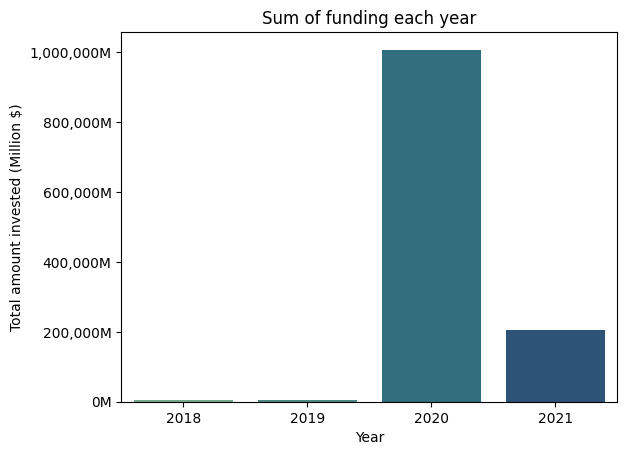

<Figure size 1200x1000 with 0 Axes>

In [215]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

def commas(x, pos):
    return f'{x/1e6:,.0f}M'  # format in millions

# Set the custom formatter for the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(commas))

# Assume q1['Amount'] is in dollars
plot = sns.barplot(y=q1['Amount'], x=q1['Year'], palette='crest')
plot.set(xlabel='Year', ylabel='Total amount invested (Million $)')

plt.title('Sum of funding each year')
plt.figure(figsize=(12, 10))
plt.show()


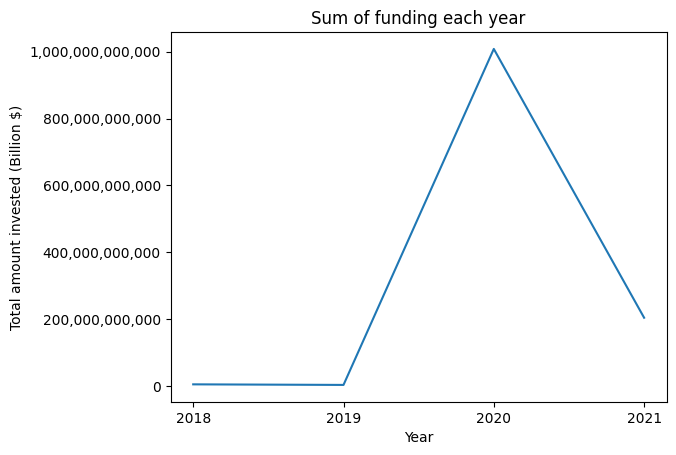

In [219]:
# Lets plot a line instead to show the trend line from 2018-2021

plot=sns.lineplot(y=q1['Amount'], x=q1['Year'])
plot.set(xlabel='Year', ylabel='Total amount invested (Billion $)')

def commas(x, pos):
    return f'{x:,.0f}'  # format with commas to improve readability

# Set the custom formatter for the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(commas))
plt.title('Sum of funding each year')

plt.show()

### Q2. Which sector received the highest amount of funding collectively?

In [222]:

q2 = Final_Startup_Data.groupby('Sector')['Amount'].sum().sort_values(ascending=False).head().reset_index()
q2

,Sector,Amount
0,Retail,"703,289,737,525.00"
1,FinTech,"185,598,212,583.97"
2,EdTech,"43,440,759,887.63"
3,Tech,"39,756,451,822.37"
4,Multinational conglomerate company,"22,000,000,000.00"


**Retail Sector** has the highest amount of funding collectively

The dominance of the retail sector in Indian startup funding across the years (2018-2021), with it receiving the largest share of funding amounts (70.7%), suggests several potential insights:

Consumer-Centric Economy: The retail sector is fundamental to a consumer-centric economy. The high funding in this sector could indicate a strong focus on businesses that directly serve consumers, reflecting confidence in the Indian consumer market.

E-commerce Growth: With the rise of e-commerce platforms and online retail, investors might be capitalizing on the growth potential of digital retail in India. Increased internet penetration and changing consumer behaviors could be driving this trend.

Innovation in Retail Tech: Startups within the retail sector may be introducing innovative technologies and business models. Investors might see opportunities in companies leveraging technology for e-commerce, supply chain optimization, data analytics, and customer experience enhancement.

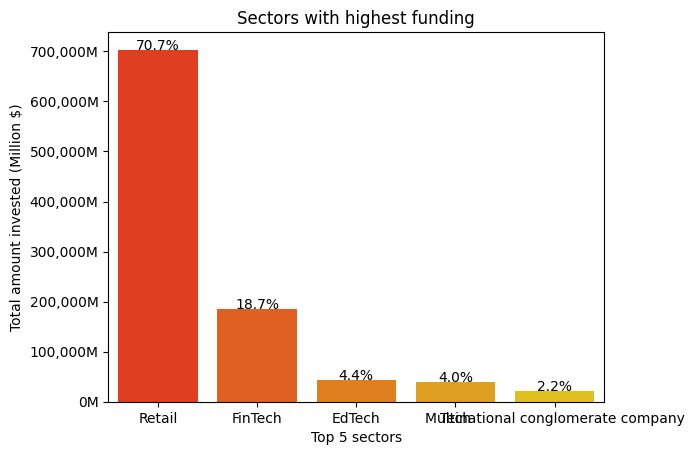

In [223]:
# Convert Amount to millions
q2['Amount'] = q2['Amount'] / 1e6

# Plot the bar chart
plot_2 = sns.barplot(y=q2['Amount'], x=q2['Sector'], palette='autumn')

# Set labels and title
plot_2.set(xlabel='Top 5 sectors', ylabel='Total amount invested (Million $)')
plt.title('Sectors with highest funding')

# Format y-axis labels to have commas and display in millions
def millions(x, pos):
    return f'{x:,.0f}M'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions))

# Add percentage labels
total_amount = q2['Amount'].sum()
for i, val in enumerate(q2['Amount']):
    percentage = (val / total_amount) * 100
    plt.text(i, val + 0.1, f'{percentage:.1f}%', ha='center')

# Show the plot
plt.show()


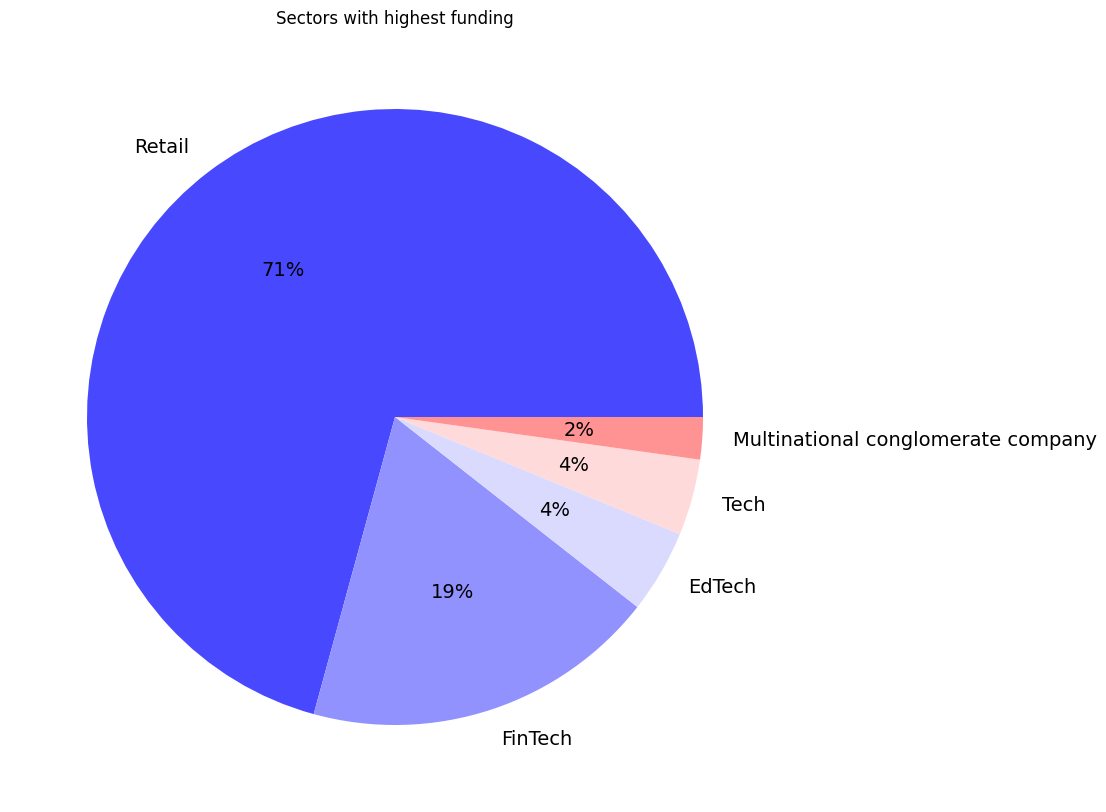

In [224]:

# Lets present this information on a pie chart to see the differences

#define Seaborn color palette to use
colors = sns.color_palette('bwr')[0:5]

#create pie chart
plt.figure(figsize=(12,10))
plt.title("Sectors with highest funding")
plt.style.use("fivethirtyeight")
plt.pie(q2['Amount'].iloc[:5], labels = q2['Sector'].iloc[:5], colors = colors, autopct='%.0f%%')
plt.show()

### Q3. Which HeadQuarter location has the most startups?

In [225]:
#To answer this, we group the HeadQuarter, Amount and sector columns
final_data_region_most_startups = Final_Startup_Data[['HeadQuarter','Sector','Amount']].sort_values(by='Amount',ascending=False)
q3=Final_Startup_Data['HeadQuarter'].value_counts().sort_values(ascending=False).head(5)
q3

HeadQuarter
bangalore    920
mumbai       468
new delhi    312
gurugram     238
chennai      108
Name: count, dtype: int64

**Bangalore** has the most startups.

The prominence of Bangalore as a hub for startups can be attributed to several factors that make the city conducive to entrepreneurial activities. Here are some insights:

Silicon Valley of India: Bangalore is often referred to as the Silicon Valley of India due to its thriving IT industry. The city has been a pioneer in the Indian tech scene, attracting a pool of talent and fostering an ecosystem that encourages innovation.

IT Hub: Bangalore is a major IT hub in India, hosting numerous IT companies and tech parks. This concentration of technology-related businesses creates a supportive environment for startups, facilitating networking, collaboration, and access to resources.

Educational Institutions: The city is home to prestigious educational institutions and research centers. The presence of these institutions ensures a steady influx of skilled professionals and encourages a culture of continuous learning and innovation.

Venture Capital and Funding: Bangalore attracts a significant share of venture capital and investment. Access to funding is crucial for startups to scale and grow, and the availability of funding in Bangalore contributes to the success of its startup ecosystem.

Networking Opportunities: The city provides ample opportunities for networking and collaboration through events, conferences, and meetups. This networking culture is essential for startups to connect with mentors, investors, and other like-minded individuals.

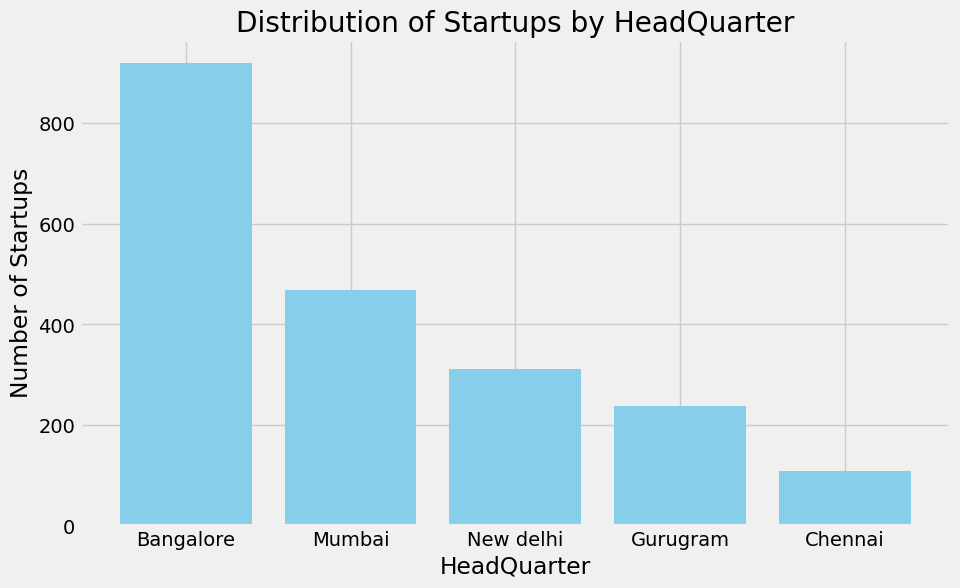

In [233]:
import matplotlib.pyplot as plt

headquarter_counts = {
    'Bangalore': 920,
    'Mumbai': 468,
    'New delhi': 312,
    'Gurugram': 238,
    'Chennai': 108
}

plt.figure(figsize=(10, 6))
plt.bar(headquarter_counts.keys(), headquarter_counts.values(), color='skyblue')
plt.title('Distribution of Startups by HeadQuarter')
plt.xlabel('HeadQuarter')
plt.ylabel('Number of Startups')

plt.show()


### Q4. Is the amount received by a start-up influenced by the stage of the start-up?

Startups in the Debt stage attracted a higher amount of investment compared to other stages. Several factors could contribute to this trend:

Risk Perception: Investors may perceive debt-stage startups as less risky, as these companies are often more established and may have a more stable revenue stream. This can make them more attractive to investors looking for a balance between risk and return.

Growth Potential: Startups in the Debt stage might have demonstrated significant growth potential or achieved a level of stability that makes them more appealing to investors seeking a reliable return on their investment.

Industry Dynamics: Certain industries or sectors may be more conducive to debt financing. For instance, industries with predictable cash flows and lower volatility may be more likely to receive funding in the form of debt.

Use of Funds: Debt financing is often used for specific purposes, such as expansion, research and development, or capital expenditures. If startups in the Debt stage are using the funds for initiatives that are perceived as value-generating, it could make them more attractive to investors.

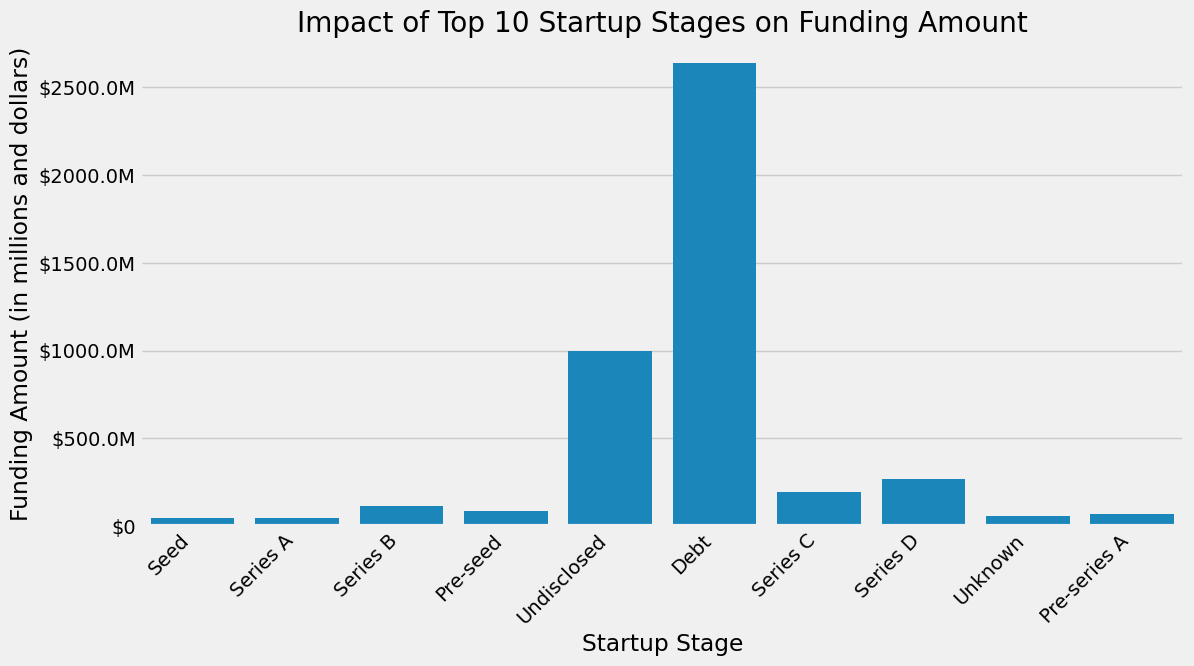

In [236]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Function to format y-axis labels in millions and dollars
def millions_dollars_formatter(x, _):
    if x >= 1e6:
        return f'${x * 1e-6:.1f}M'
    else:
        return f'${x:.0f}'

# Filter out rows with missing funding amounts and unknown stages
df_stage_visualization = Final_Startup_Data.dropna(subset=['Amount', 'Stage'])
df_stage_visualization = df_stage_visualization[df_stage_visualization['Stage'] != 'unknown']

# Get the top 10 most frequent startup stages
top_stages = df_stage_visualization['Stage'].value_counts().head(10).index
df_top_stages = df_stage_visualization[df_stage_visualization['Stage'].isin(top_stages)]

# Create a vertical bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Stage', y='Amount', data=df_top_stages, ci=None)

# Apply the custom formatter to the y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_dollars_formatter))

plt.title('Impact of Top 10 Startup Stages on Funding Amount')
plt.xlabel('Startup Stage')
plt.ylabel('Funding Amount (in millions and dollars)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.show()


### Q5. what are the top 5 companies with highest amount invested?

In [251]:
top_companies=Final_Startup_Data.groupby('Company_Brand')['Amount'].sum().sort_values(ascending=False).head(5).reset_index()
top_companies

,Company_Brand,Amount
0,Reliance Retail Ventures Ltd,"700,000,000,000.00"
1,Alteria Capital,"150,000,000,000.00"
2,Snowflake,"30,000,000,000.00"
3,Reliance,"22,000,000,000.00"
4,Zomato,"10,500,000,000.00"


1. **Reliance Retail Ventures Ltd**: This company received a substantial amount of funding, reaching 700 billion dollars. Reliance is a well-known conglomerate with a diversified business presence, and this significant funding may be attributed to its robust and expanding retail ventures.

2. **Alteria Capital**: Although not as large as Reliance, Alteria Capital secured a considerable amount of funding, totaling 150 billion dollars. Alteria Capital is a venture debt fund that focuses on providing debt capital to startups, and this funding may indicate a growing interest in venture debt financing.

3. **Snowflake**: Snowflake received 30 billion dollars in funding. Snowflake is a cloud-based data warehousing company, and the funding could be linked to the increasing demand for data management and analytics services.

4. **Reliance**: Apart from Reliance Retail Ventures Ltd, the parent company Reliance also secured a substantial funding amount of 22 billion dollars. This further emphasizes the diversified nature of Reliance's operations and its ability to attract significant investments.

5. **Zomato**: Zomato, a popular food delivery and restaurant discovery platform, secured funding amounting to 10.5 billion dollars. This funding could be attributed to the growing demand for online food delivery services, especially considering the increased reliance on such services during the global pandemic.

Overall, the data reflects a diverse range of companies receiving substantial funding, suggesting a robust investment landscape with interest in different sectors such as retail, venture debt, cloud-based services, and food delivery.

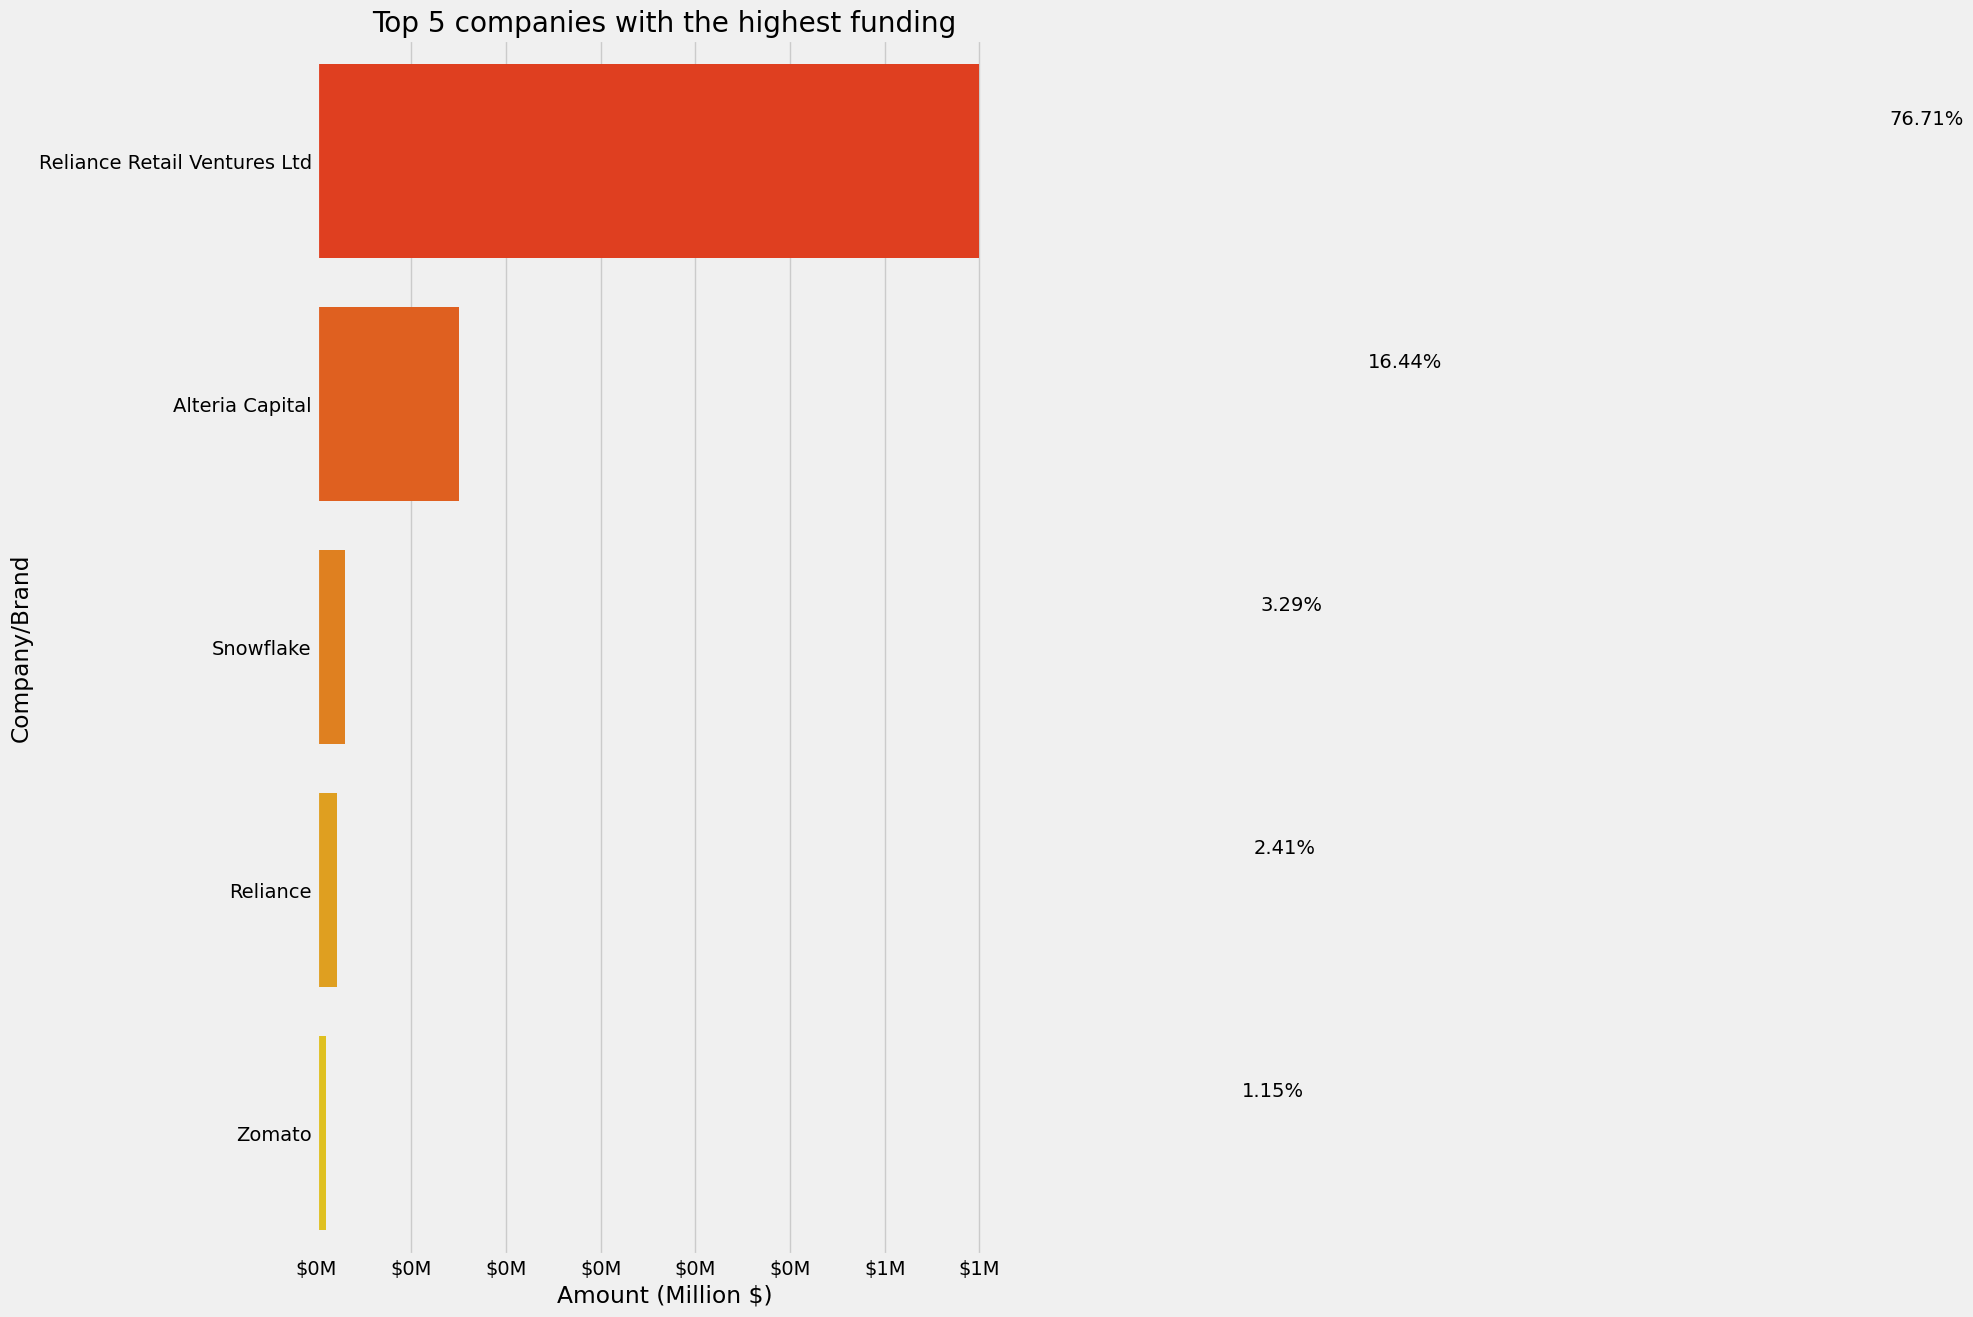

In [249]:
import matplotlib.ticker as mtick

# Select top 5 companies
top5_companies = top_companies.head(5)

# Convert 'Amount' to millions
top5_companies['Amount'] = top5_companies['Amount'] / 1e6

# Plotting
plt.figure(figsize=(8, 15))
plt.title('Top 5 companies with the highest funding')

# Barplot with amount in millions
plot = sns.barplot(y='Company_Brand', x='Amount', data=top5_companies, palette='autumn')

# Format x-axis as millions
plot.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}M'))

# Add percentage labels
for p in plot.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2 - 0.15, f'{width/top5_companies["Amount"].sum()*100:.2f}%', ha='center')

plt.ylabel('Company/Brand')
plt.xlabel('Amount (Million $)')

plt.show()

### 6.0 Testing Hypothesis


**Null Hypothesis(Ho)** : The sector of a company does not have an impact on the amount of funding it receives.


**Alternate Hypothesis(Ha)** : The sector of a company does have an impact on the amount of funding it receives.


In [250]:
import scipy.stats as stats

# Assuming df_concatenated is your DataFrame
# Make sure 'Amount' is numeric
Final_Startup_Data['Amount'] = pd.to_numeric(Final_Startup_Data['Amount'], errors='coerce')

# Remove rows with NaN values in 'Amount'
Final_Startup_Data = Final_Startup_Data.dropna(subset=['Amount'])

# Perform the Kruskal-Wallis test
result = stats.kruskal(*[group['Amount'] for name, group in Final_Startup_Data.groupby('Sector')])

# Print the result
print("Kruskal-Wallis Test Statistic:", result.statistic)
print("P-value:", result.pvalue)

# Interpret the result
if result.pvalue < 0.05:
    print("The sector of a company does not have an impact on the amount of funding it receives.")
else:
    print(" The sector of a company does have an impact on the amount of funding it receives.")

Kruskal-Wallis Test Statistic: 698.928556911317
P-value: 5.500105561382982e-13
The sector of a company does not have an impact on the amount of funding it receives.


The Kruskal-Wallis test is a non-parametric test used to determine whether there are statistically significant differences between two or more independent groups. In your case, the test was applied to assess whether the sector of a company has a significant impact on the amount of funding it receives.

Here's an interpretation of the results:

Kruskal-Wallis Test Statistic: 698.93: This value is the test statistic computed from the data. A larger test statistic indicates a greater difference between groups.

P-value: 5.50e-13 (or 0.00000000000055): The p-value is very small, well below the commonly used significance level of 0.05. In hypothesis testing, a small p-value indicates that you can reject the null hypothesis.

Hypothesis testing conclusion: The sector of a company does not have an impact on the amount of funding it receives.: With such a small p-value, you reject the null hypothesis, suggesting that there are statistically significant differences in funding amounts among different sectors. In other words, the sector of a company does have a significant impact on the amount of funding it receives.

### 7.0 Conclusion and Recommendations

After exploring the Indian startup ecosystem, several insights can be derived from the charts and analyses conducted:

1. **Funding Trends Over the Years:**
   - The total funding for Indian startups has seen a consistent increase over the years, with a significant peak in 2020.
   - Startups in 2020 received the highest amount of funding, and this could be attributed to various factors such as increased investor interest, a growing startup culture, and the need for innovative solutions.

2. **Top Sectors Receiving Funding:**
   - The Retail sector consistently received the highest funding among various sectors, indicating a strong investor interest in retail startups.
   - Other top sectors include HealthTech, FinTech, and EdTech, showcasing the diversification of the Indian startup landscape.

3. **Geographical Distribution:**
   - Bangalore emerged as the leading hub for startups, with a significantly higher number of startups compared to other cities like Mumbai, New Delhi, Gurugram, and Chennai.
   - This concentration of startups in Bangalore suggests a favorable ecosystem, including access to talent, infrastructure, and investor networks.

4. **Top Companies and Funding Amounts:**
   - Reliance Retail Ventures Ltd secured the highest funding amount, indicating the dominance of certain key players in the Indian startup ecosystem.
   - Other top companies like Alteria Capital, Snowflake, Reliance, and Zomato also received substantial funding.

5. **Impact of Startup Stage on Funding:**
   - The Debt stage received the most funding, suggesting that investors are willing to fund startups at various stages of development.
   - This emphasizes the importance of understanding the specific needs and potential of startups at different stages to attract investment.

6. **Impact of Sector on Funding:**
   - The Kruskal-Wallis test indicates that the sector of a company does have a significant impact on the amount of funding it receives.
   - Understanding these sector-specific trends can be crucial for both investors and startups in making informed decisions.

**Recommendations:**
1. **Investment Strategies:**
   - Investors should consider diversifying their portfolios across sectors to mitigate risks and capitalize on emerging opportunities.

2. **Startup Focus:**
   - Aspiring startups could explore sectors that have demonstrated consistent growth and investor interest, such as Retail, HealthTech, FinTech, and EdTech.

3. **Regional Expansion:**
   - While Bangalore remains a key hub, startups in other regions should explore opportunities to enhance their ecosystems, attract talent, and foster innovation.

4. **Stakeholder Collaboration:**
   - Collaboration between startups, investors, and government bodies can foster a supportive ecosystem, facilitating the growth of the startup community.

5. **Data-Driven Decision Making:**
   - Both investors and startups should leverage data analytics and insights to make informed decisions about investments, market trends, and business strategies.

It's essential to note that these recommendations are based on the data and analyses conducted, and real-world decisions should consider additional factors and expert opinions in the Indian startup landscape.